In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = 'Employment DATA With Pivot Table.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Dropping non-numeric columns (Country and Group)
X = df.drop(['Country ', 'Gorup '], axis=1)

# Standardizing the data (important for clustering and PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Storing standardized data in a DataFrame for easier visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

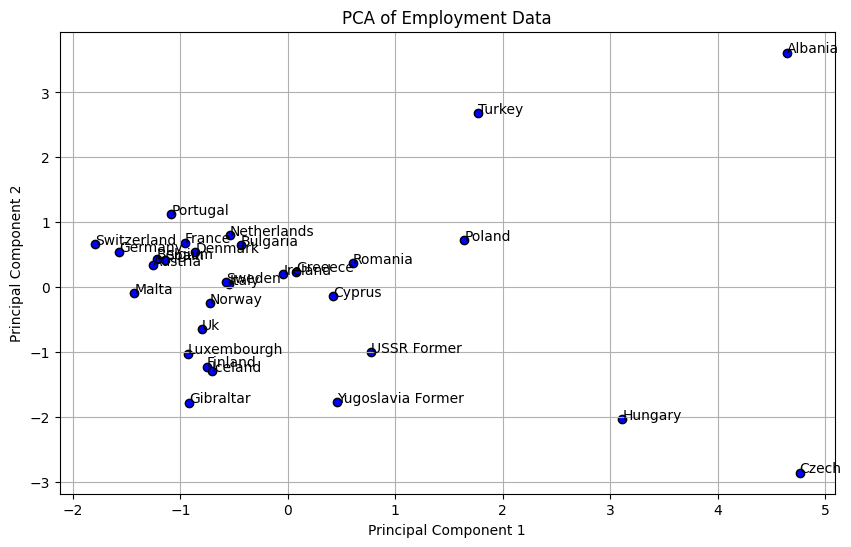

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Applying PCA to the scaled data
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Plotting PCA result
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k')

# Annotating each point with the country name
for i, country in enumerate(df['Country ']):
    plt.text(X_pca[i, 0], X_pca[i, 1], country)

plt.title('PCA of Employment Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

c:\Users\tmawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


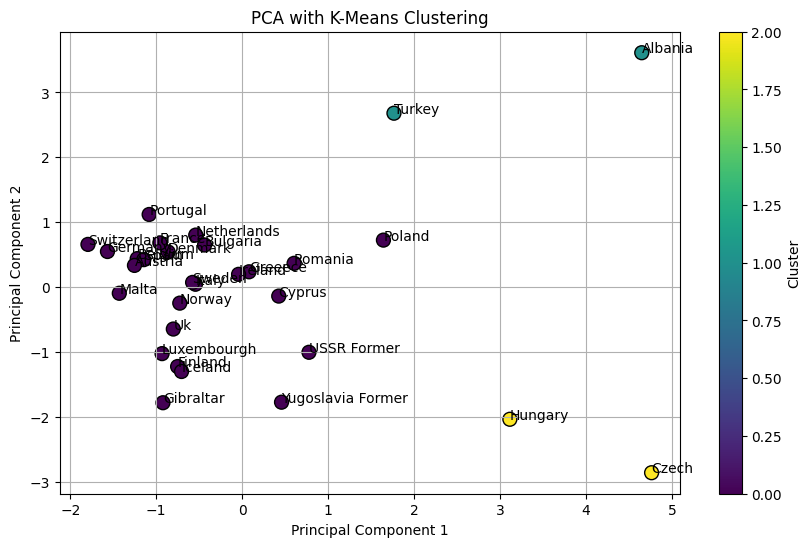

In [6]:
from sklearn.cluster import KMeans

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster information to the dataset
df['Cluster'] = clusters

# Plotting PCA results with clustering labels
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=100)

# Annotating each point with the country name
for i, country in enumerate(df['Country ']):
    plt.text(X_pca[i, 0], X_pca[i, 1], country)

plt.title('PCA with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.4127786953171823


In [ ]:
# Create a new DataFrame with Country and Cluster
clustered_countries = df[['Country ', 'Cluster']]

# Sort countries by cluster
clustered_countries_sorted = clustered_countries.sort_values(by='Cluster')

# Display the sorted table
print(clustered_countries_sorted)



In [15]:
# Create a table showing the countries grouped by their cluster
cluster_table = df[['Country ', 'Cluster']].groupby('Cluster')['Country '].apply(list).reset_index()

# Display the table
print(cluster_table)


   Cluster                                           Country 
0        0  [Belgium, Denmark, France, Germany, Greeece, I...
1        1                                  [Albania, Turkey]
2        2                                   [Czech, Hungary]


C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\847361283.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


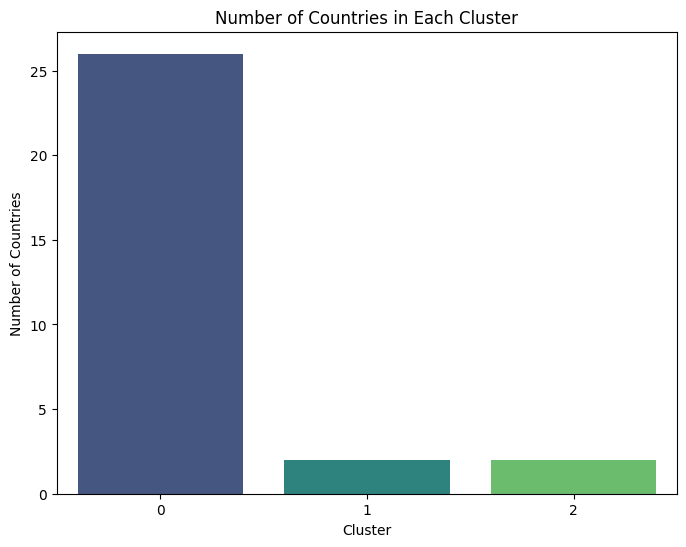

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of countries in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Countries in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.show()


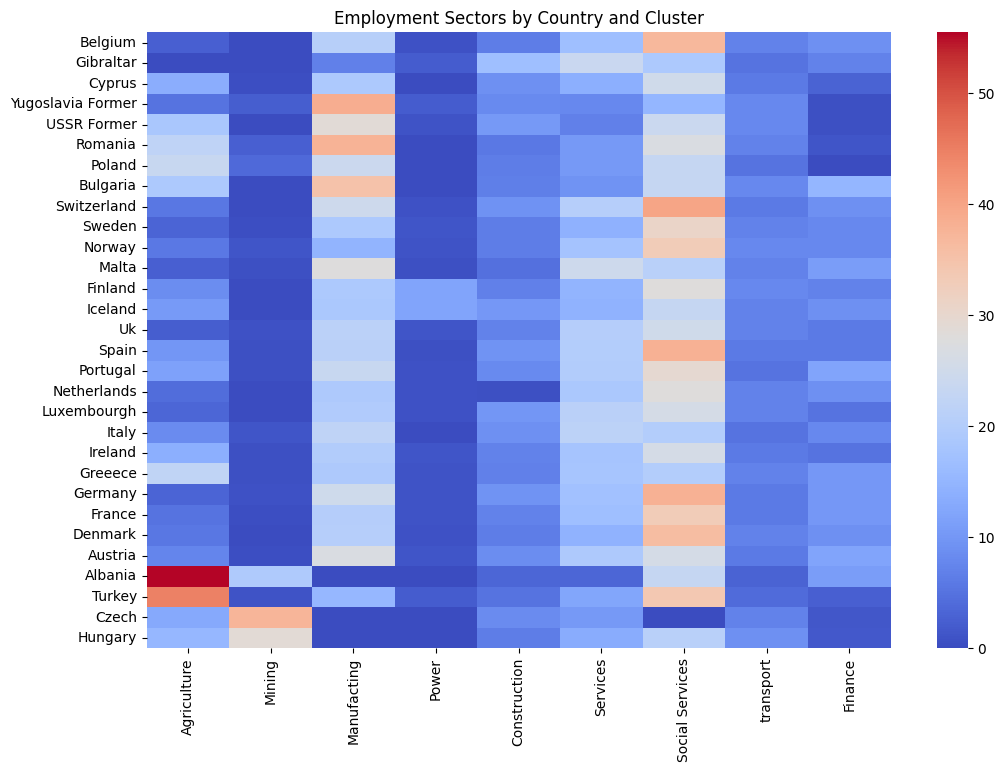

In [17]:
# Create a dataframe with countries and their original employment data, labeled by cluster
clustered_data = pd.concat([df[['Country ']], X, df['Cluster']], axis=1)

# Sort by cluster
clustered_data_sorted = clustered_data.sort_values(by='Cluster')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(clustered_data_sorted.drop(columns=['Country ', 'Cluster']), cmap='coolwarm', annot=False, yticklabels=clustered_data_sorted['Country '])
plt.title('Employment Sectors by Country and Cluster')
plt.show()


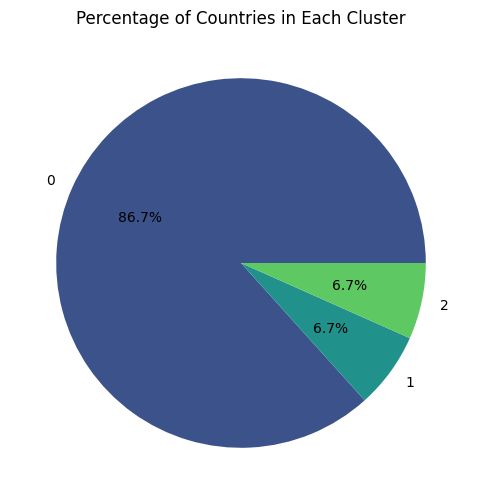

In [18]:
# Create a pie chart for cluster distribution
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(cluster_counts)))
plt.title('Percentage of Countries in Each Cluster')
plt.show()


C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


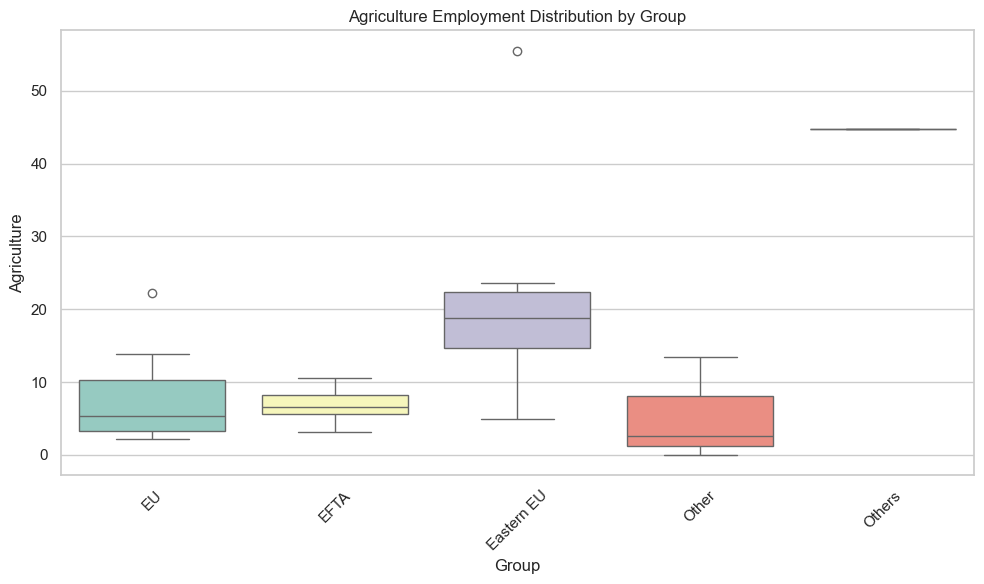

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


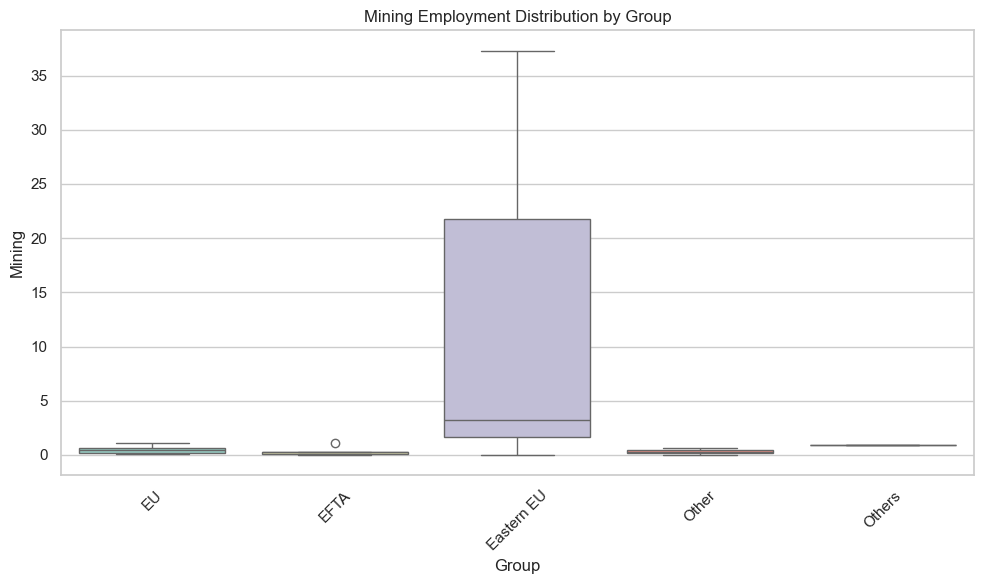

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


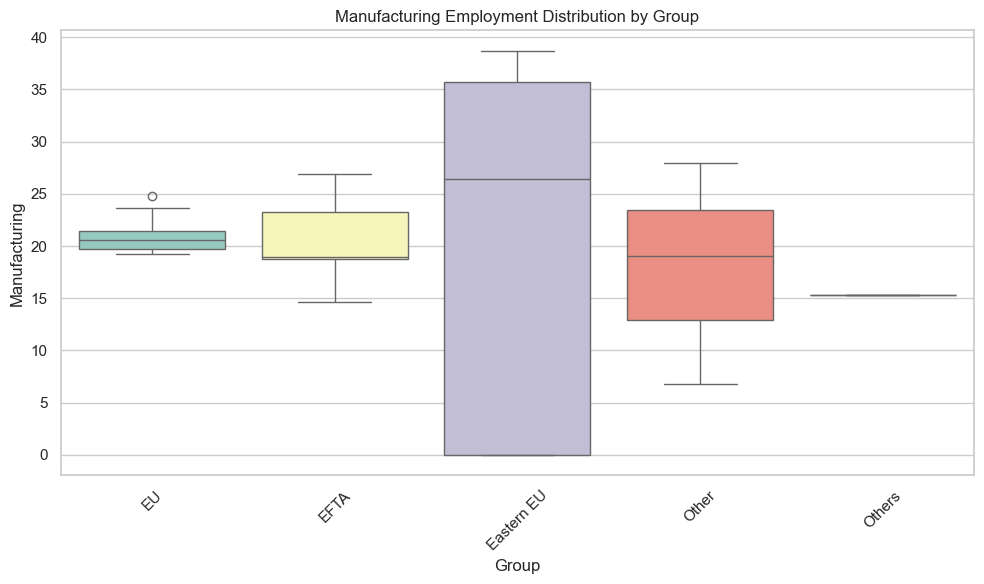

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


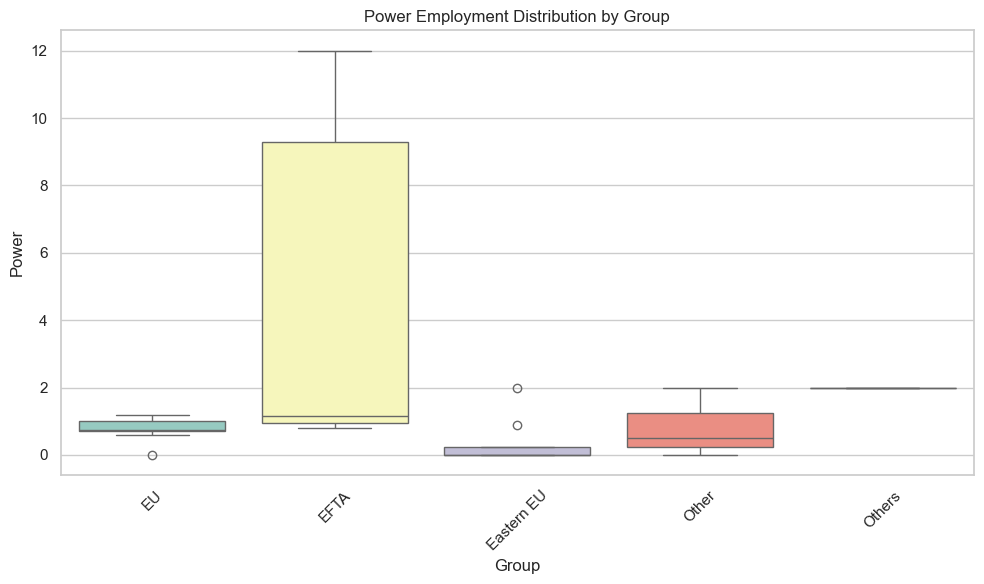

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


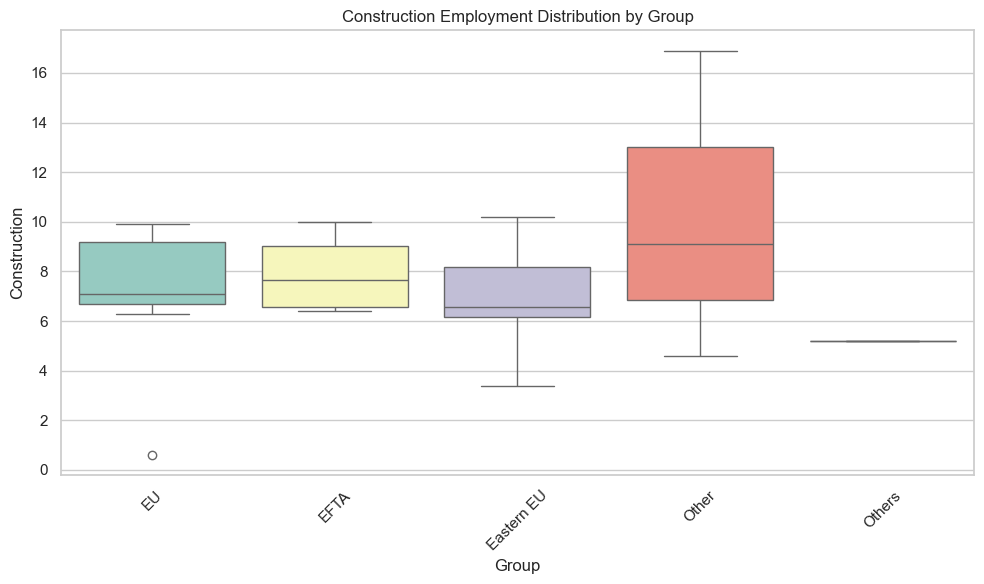

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


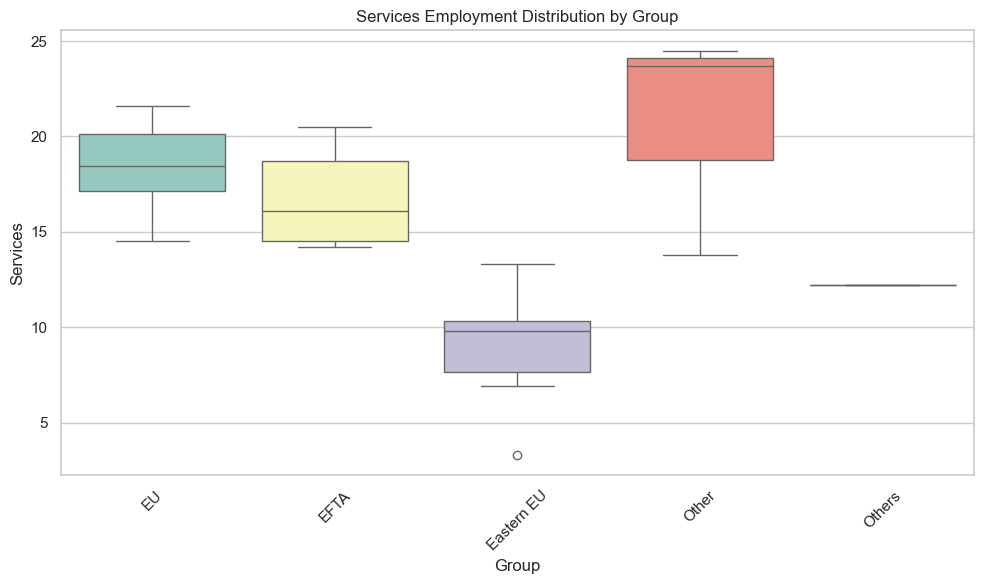

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


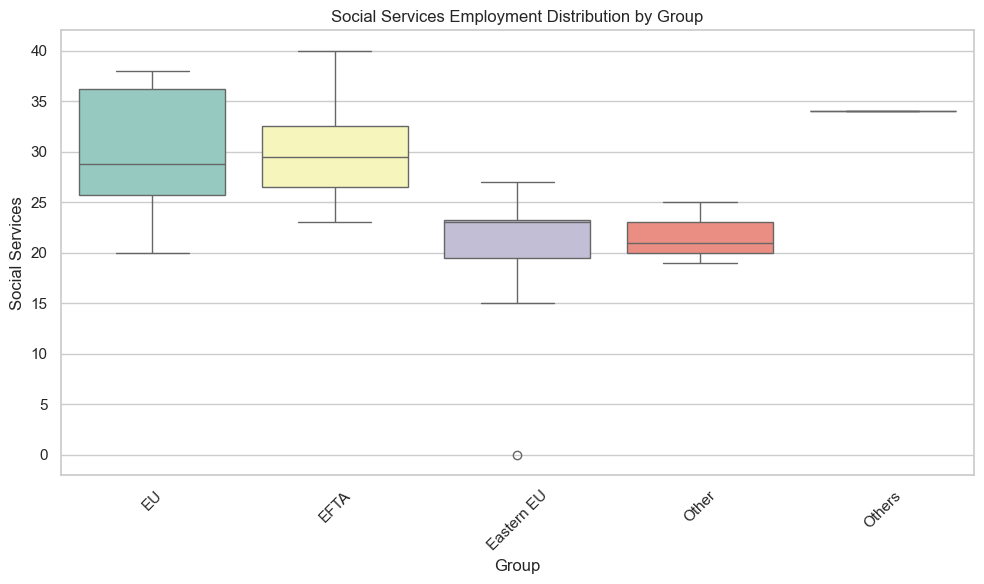

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


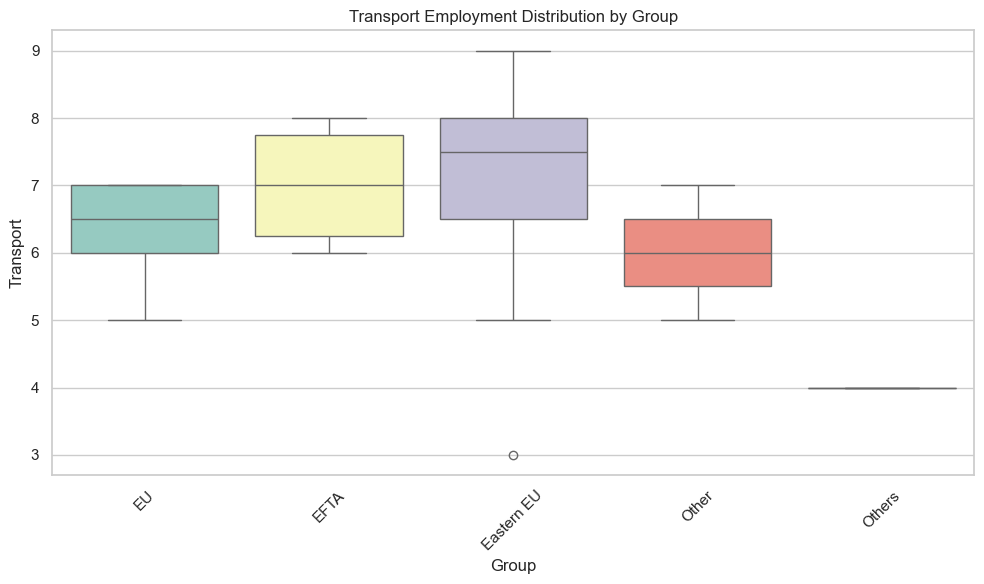

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')


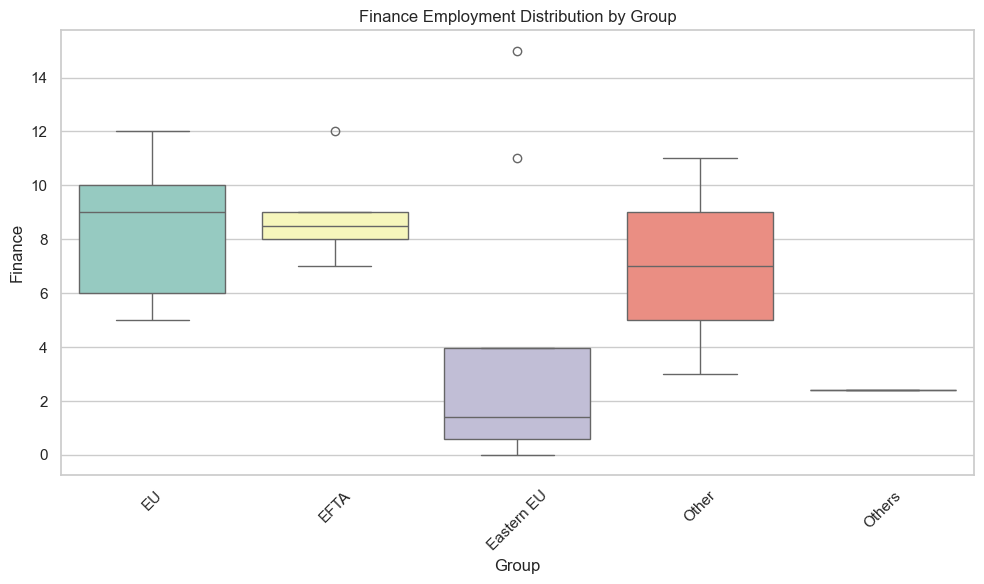

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


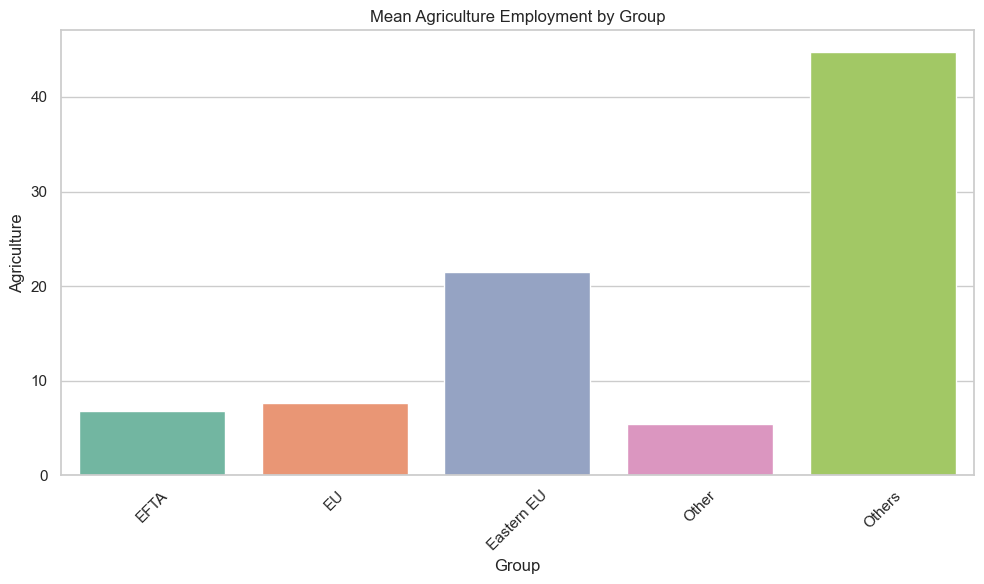

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


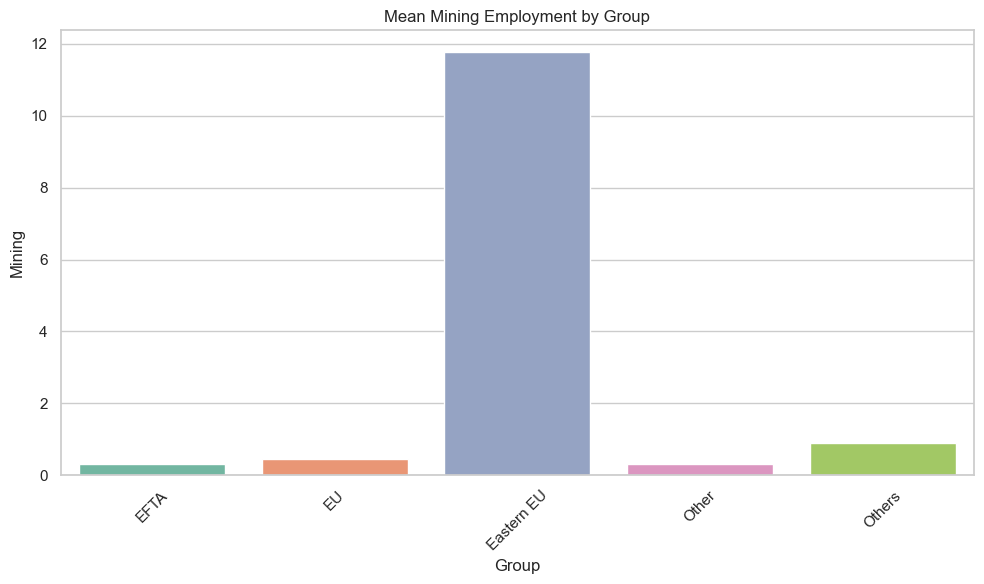

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


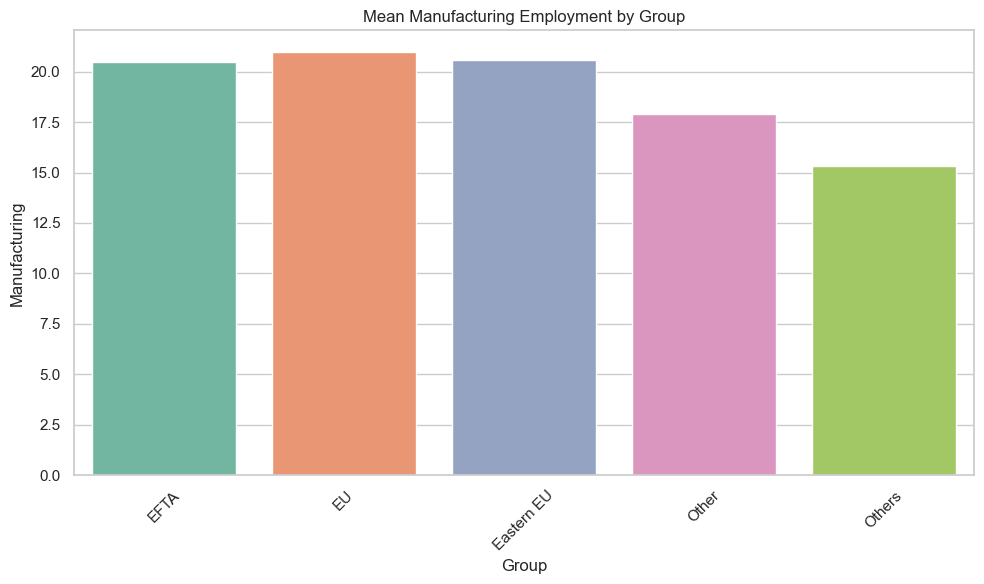

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


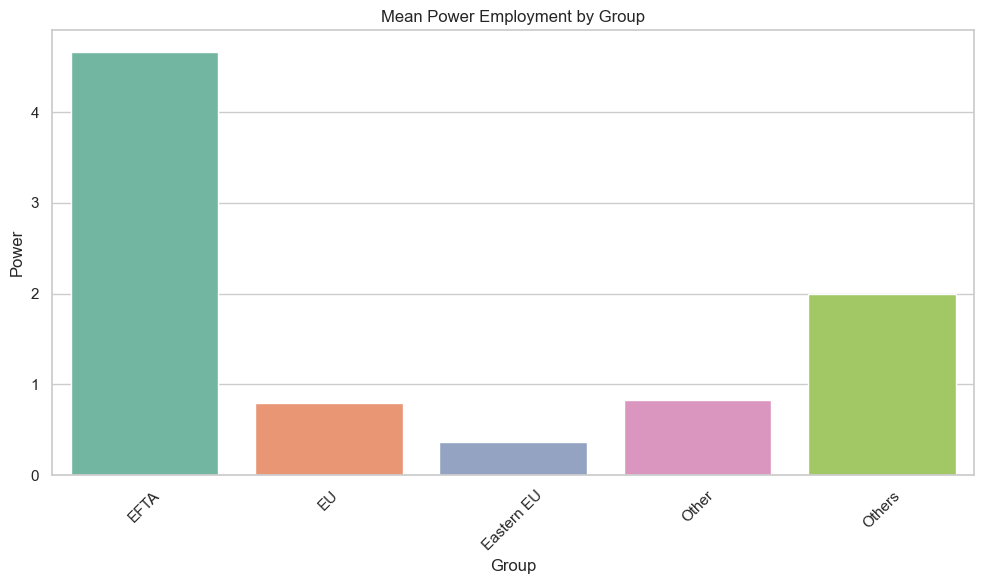

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


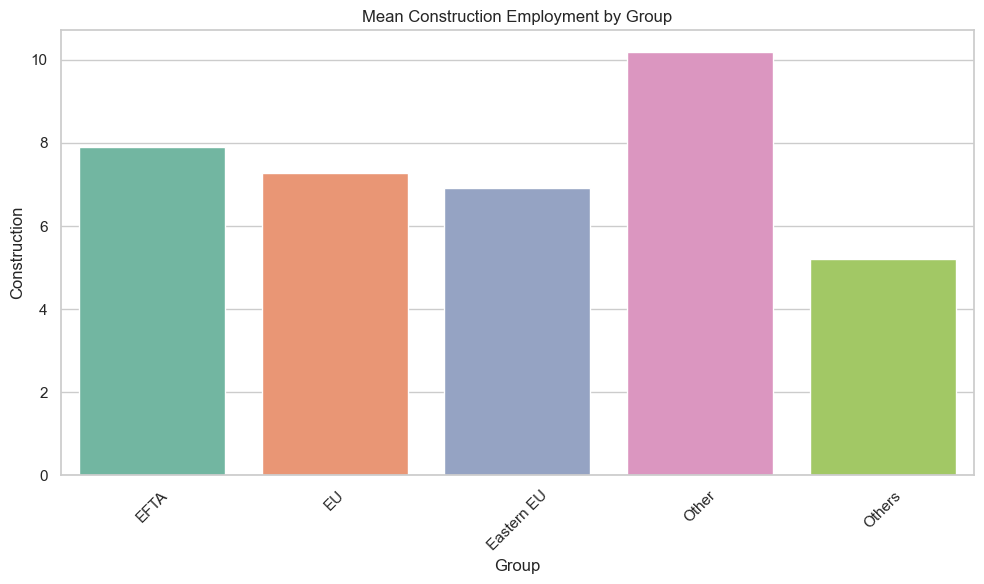

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


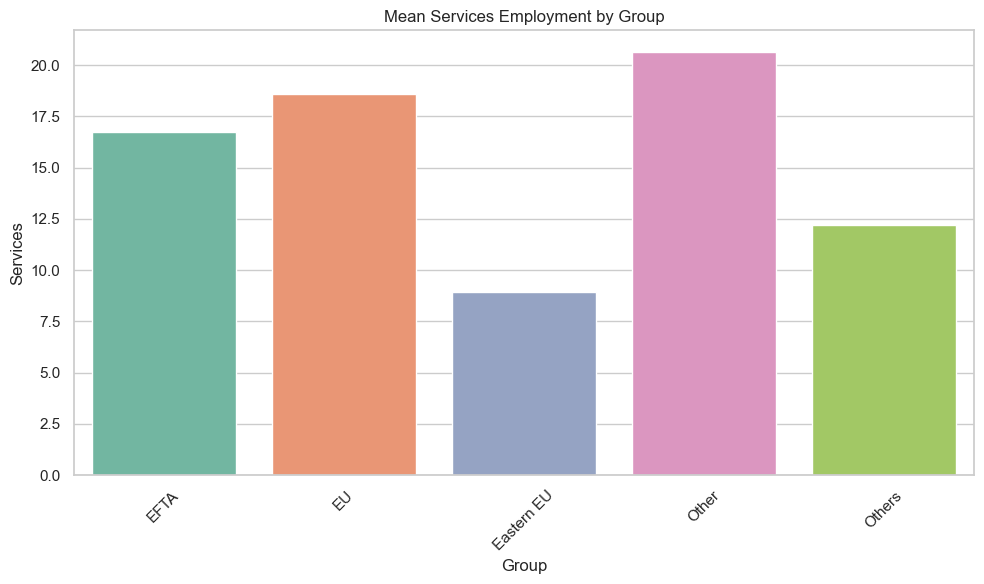

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


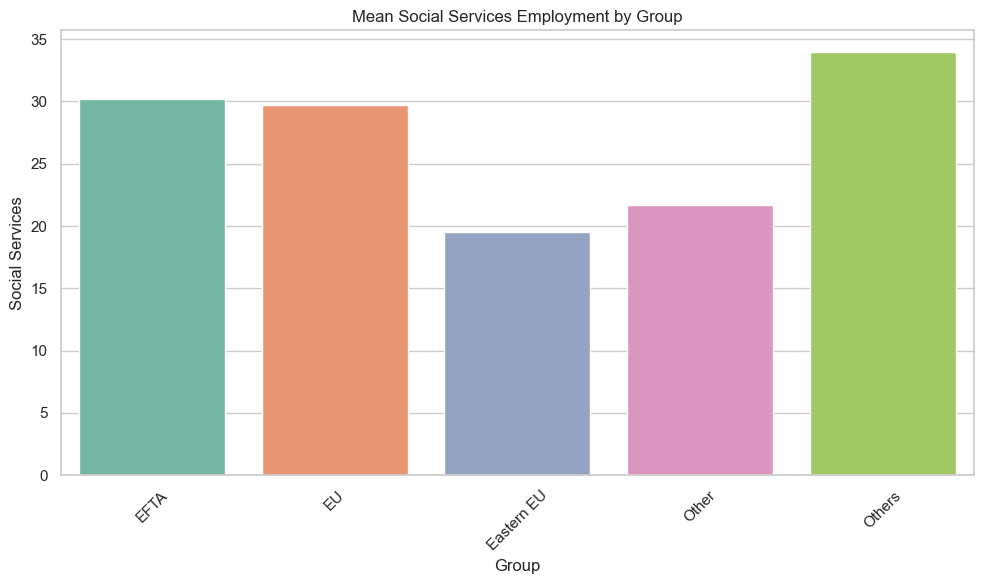

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


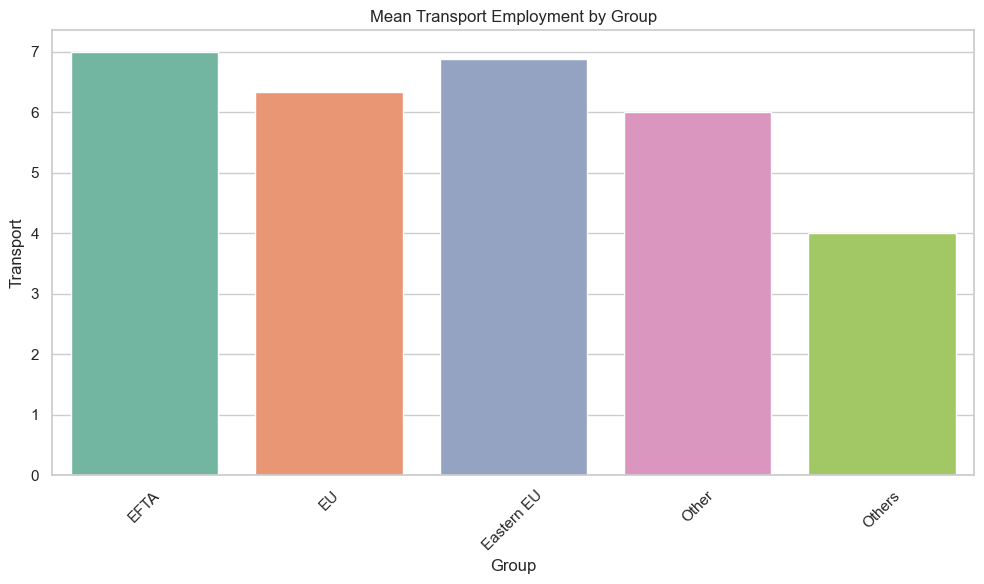

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1561232649.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')


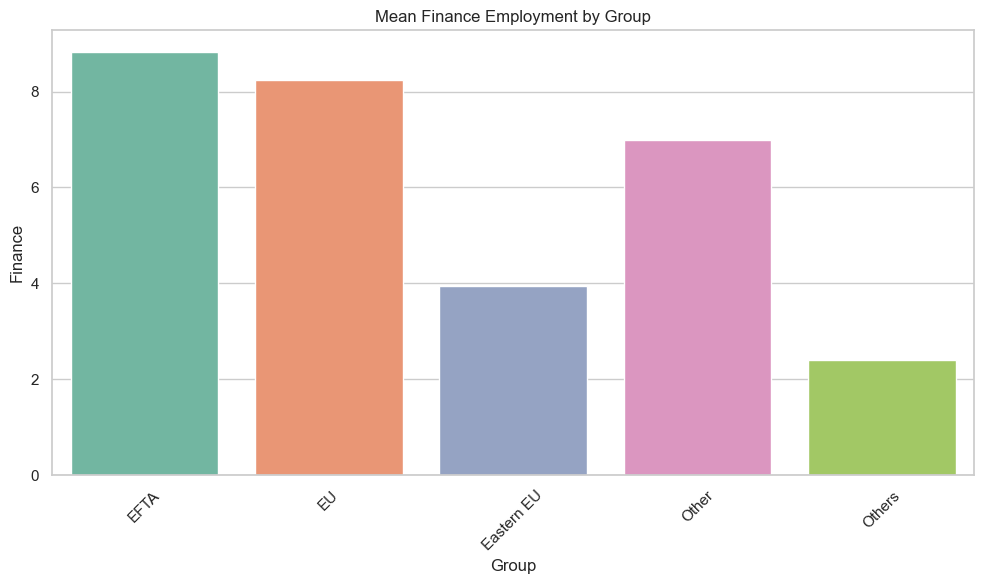

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (adjust the file path as necessary)
file_path = "Employment DATA With Pivot Table.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Clean column names: strip extra spaces and fix typos
df.columns = df.columns.str.strip()

# Rename columns again in case there are issues with spaces
df = df.rename(columns={
    'Gorup': 'Group',
    'Manufacting': 'Manufacturing',
    'transport': 'Transport'
})

# Set plot style
sns.set(style="whitegrid")

# Function to create box plots for each employment sector
def plot_boxplot_for_groups(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Group', y=column_name, data=df, palette='Set3')
    plt.title(f'{column_name} Employment Distribution by Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of columns to visualize
columns_to_plot = ['Agriculture', 'Mining', 'Manufacturing', 'Power', 
                   'Construction', 'Services', 'Social Services', 
                   'Transport', 'Finance']

# Generate box plots for each sector
for col in columns_to_plot:
    plot_boxplot_for_groups(df, col)

# Bar plot of mean employment by group for each sector
def plot_mean_employment_by_group(df, column_name):
    plt.figure(figsize=(10, 6))
    mean_values = df.groupby('Group')[column_name].mean().reset_index()
    sns.barplot(x='Group', y=column_name, data=mean_values, palette='Set2')
    plt.title(f'Mean {column_name} Employment by Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Generate bar plots for mean employment by group
for col in columns_to_plot:
    plot_mean_employment_by_group(df, col)


C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1021931993.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=df, palette='Set3', ax=axes[row, col_index])
C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1021931993.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=df, palette='Set3', ax=axes[row, col_index])
C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1021931993.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=df, palette='Set3', ax=axes[row, col_index])
C:\U

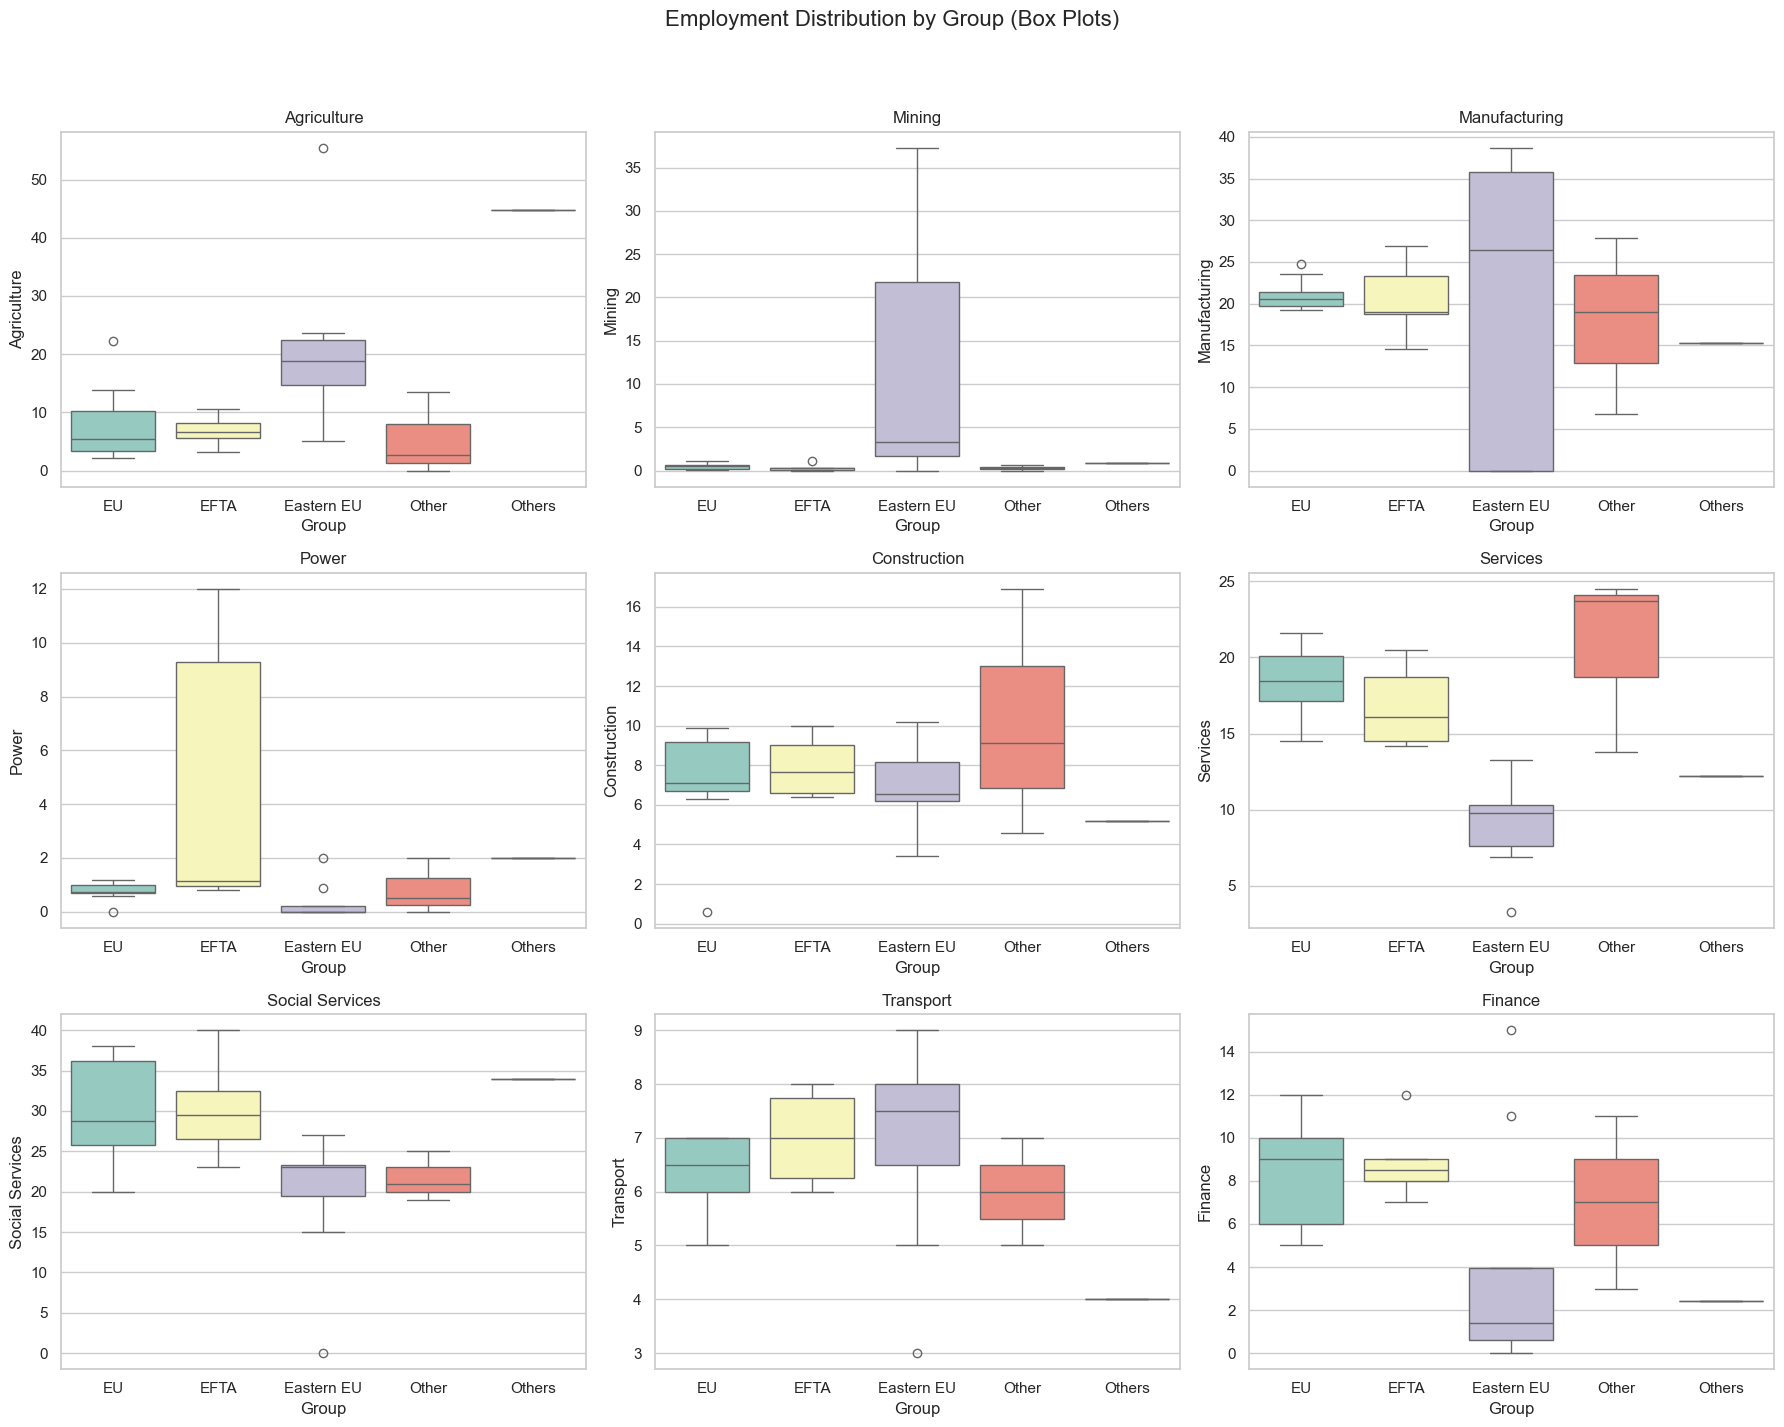

C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1021931993.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=col, data=mean_values, palette='Set2', ax=axes[row, col_index])
C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1021931993.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=col, data=mean_values, palette='Set2', ax=axes[row, col_index])
C:\Users\tmawa\AppData\Local\Temp\ipykernel_17468\1021931993.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=col, data=mean_values, palette='Set2',

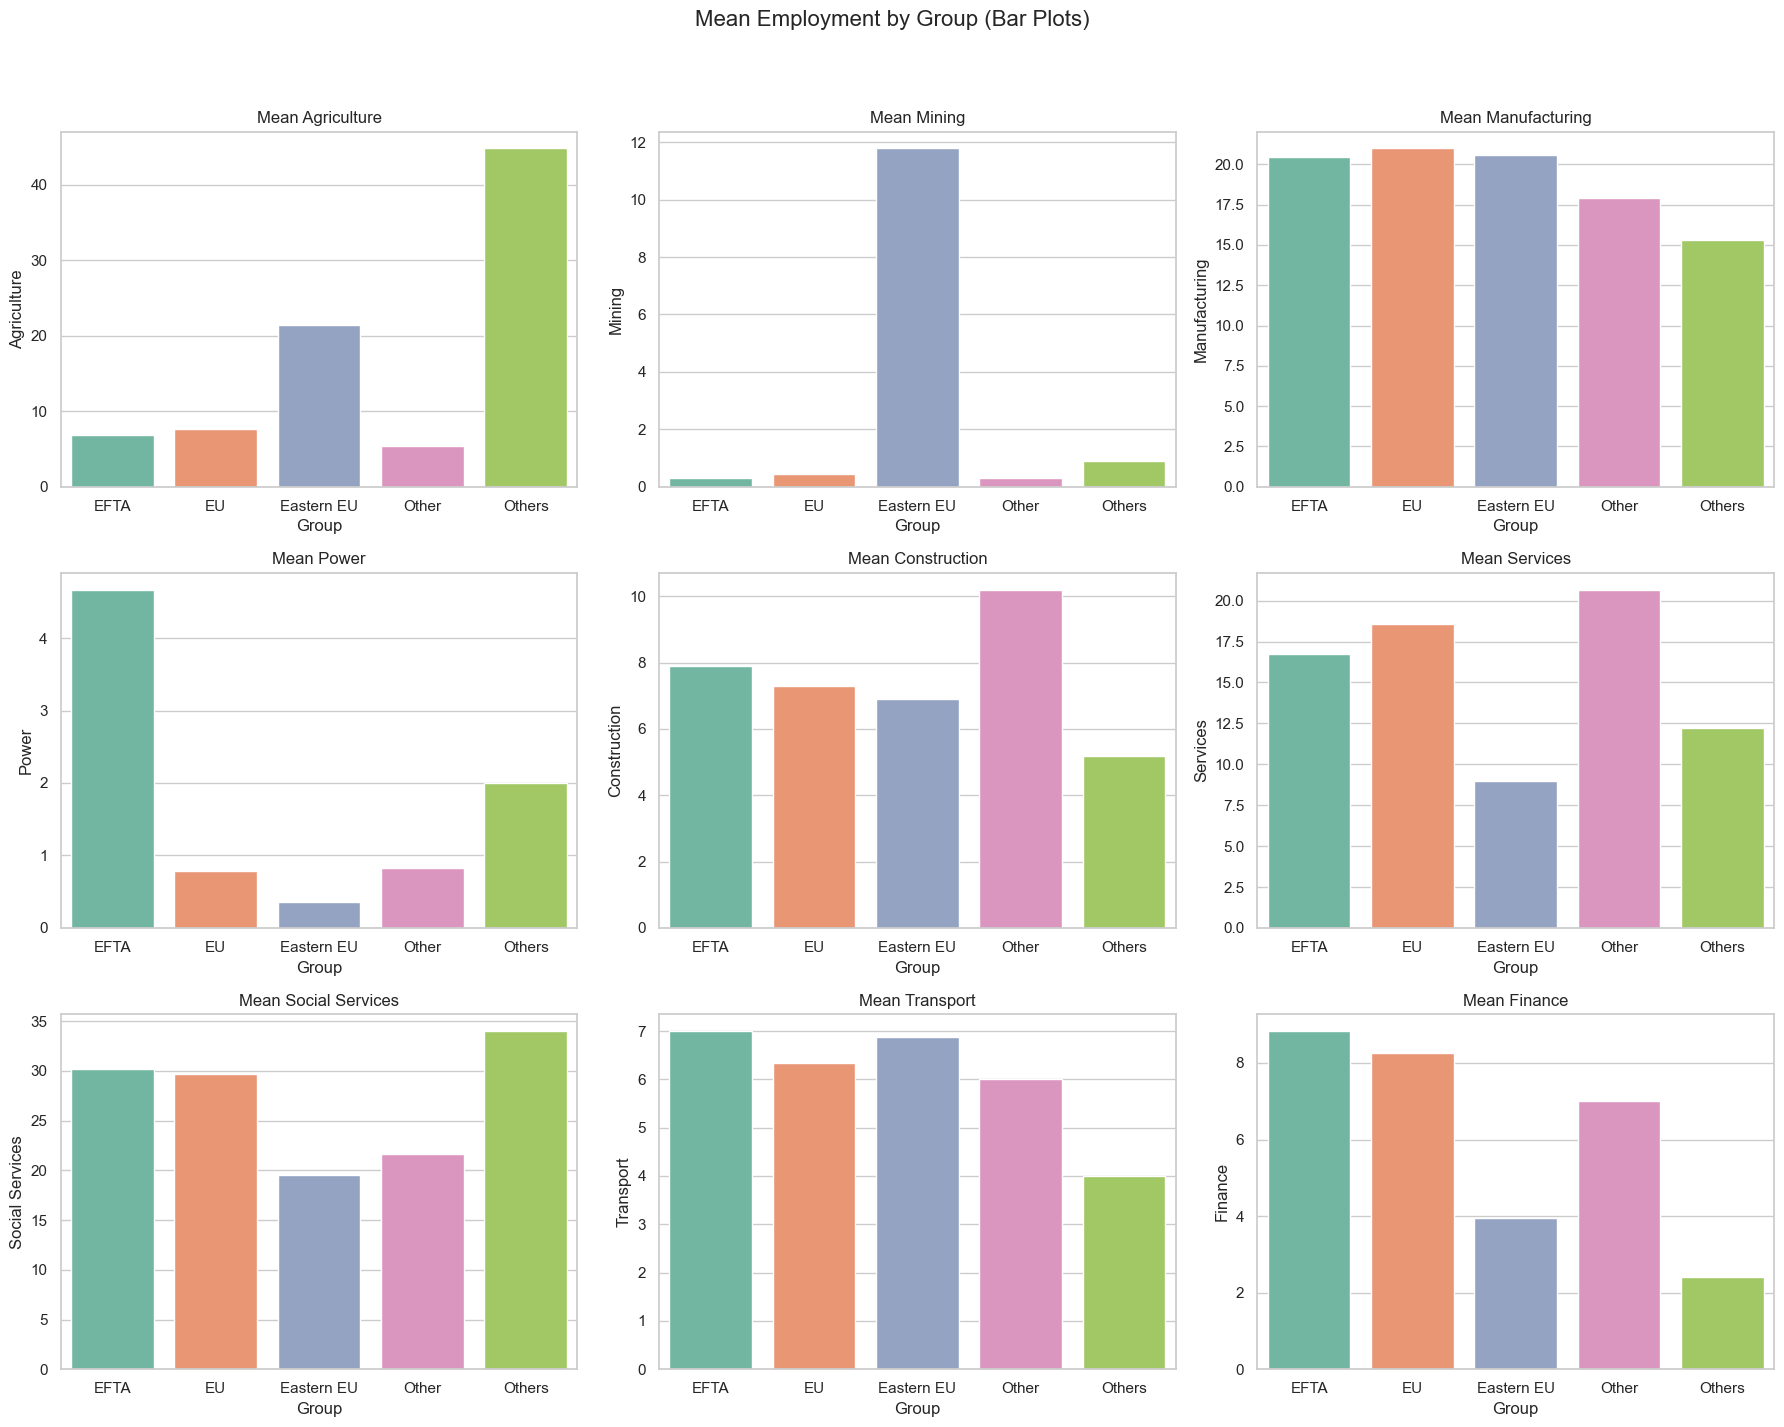

In [23]:
# Combined Box Plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Create 3x3 subplots
fig.suptitle('Employment Distribution by Group (Box Plots)', fontsize=16)

for i, col in enumerate(columns_to_plot):
    row, col_index = divmod(i, 3)
    sns.boxplot(x='Group', y=col, data=df, palette='Set3', ax=axes[row, col_index])
    axes[row, col_index].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

# Combined Bar Plots of Mean Employment by Group
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Create 3x3 subplots
fig.suptitle('Mean Employment by Group (Bar Plots)', fontsize=16)

for i, col in enumerate(columns_to_plot):
    row, col_index = divmod(i, 3)
    mean_values = df.groupby('Group')[col].mean().reset_index()
    sns.barplot(x='Group', y=col, data=mean_values, palette='Set2', ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Mean {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

Country             Belgium   Denmark    France   Germany   Greeece   Ireland  \
Country                                                                         
Belgium            1.000000  0.994172  0.994968  0.992923  0.640668  0.887178   
Denmark            0.994172  1.000000  0.993479  0.988976  0.685250  0.906527   
France             0.994968  0.993479  1.000000  0.993415  0.701205  0.914449   
Germany            0.992923  0.988976  0.993415  1.000000  0.646751  0.890866   
Greeece            0.640668  0.685250  0.701205  0.646751  1.000000  0.896129   
Ireland            0.887178  0.906527  0.914449  0.890866  0.896129  1.000000   
Italy              0.837648  0.826818  0.873659  0.860223  0.814878  0.919643   
Luxembourgh        0.934678  0.913152  0.941777  0.940010  0.682656  0.908461   
Netherlands        0.961876  0.950913  0.966245  0.945308  0.722116  0.903971   
Portugal           0.932963  0.942091  0.962929  0.944295  0.846743  0.962073   
Spain              0.969174 

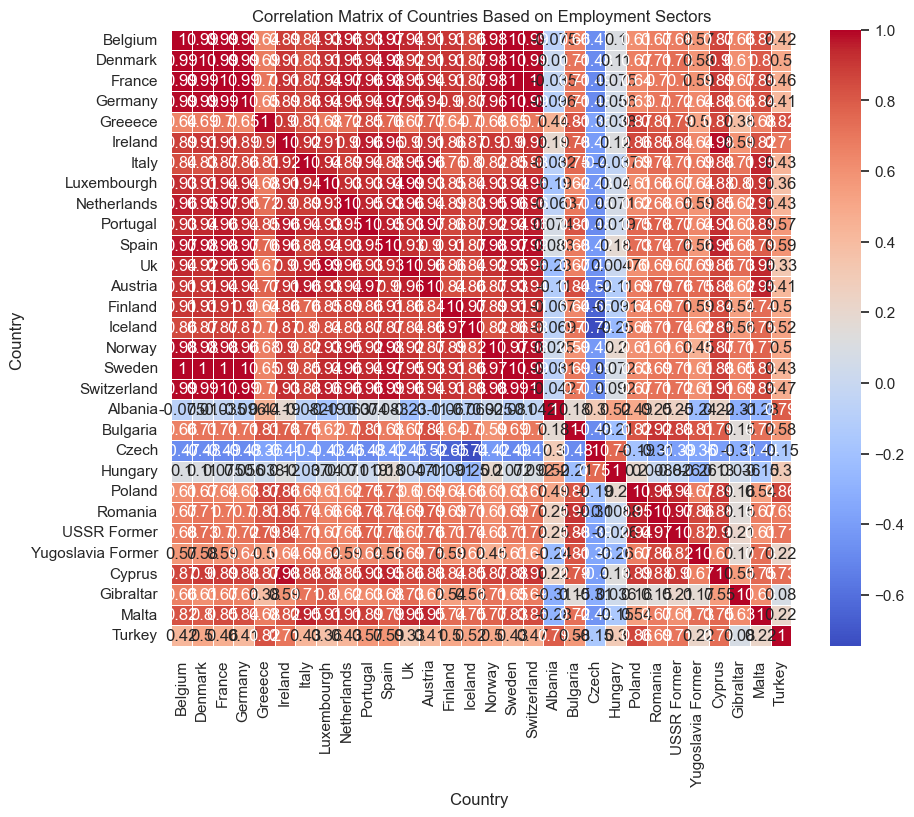

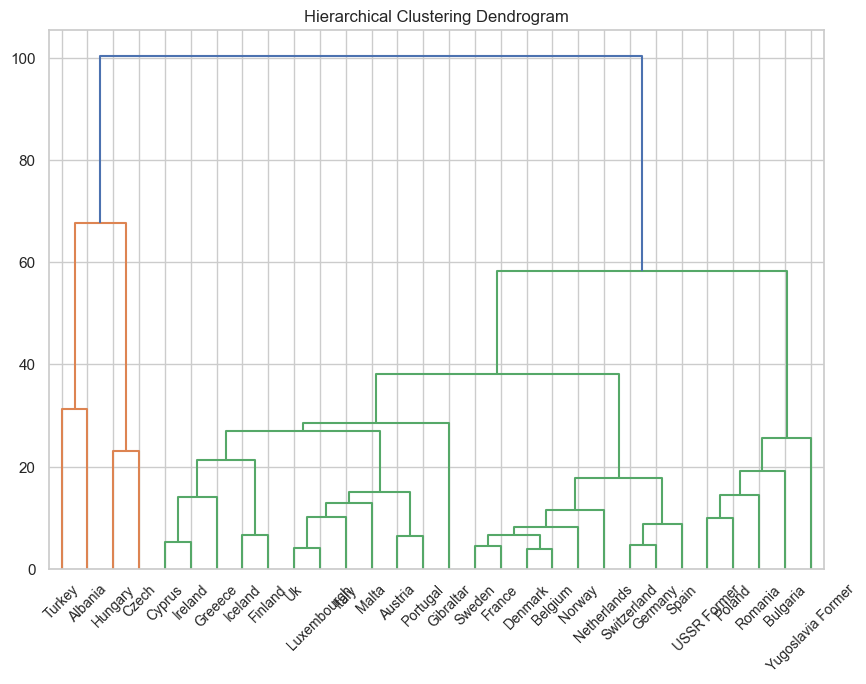

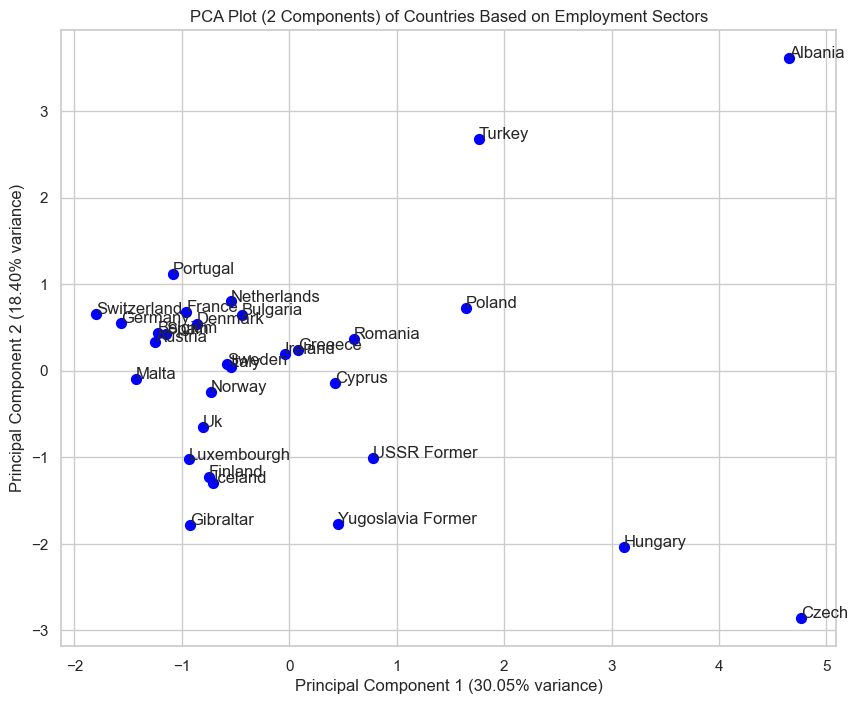

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the data
file_path = "Employment DATA With Pivot Table.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Clean column names (correct typos)
df = df.rename(columns={
    'Gorup': 'Group',
    'Manufacting': 'Manufacturing',
    'transport': 'Transport'
})

# Set country as index for further analysis
df.set_index('Country ', inplace=True)

# Select only employment-related columns
employment_columns = ['Agriculture', 'Mining', 'Manufacturing', 'Power', 
                      'Construction', 'Services', 'Social Services', 
                      'Transport', 'Finance']
data = df[employment_columns]

# 1. Correlation Analysis
def plot_country_correlation(df):
    corr_matrix = df.T.corr()
    print(corr_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Countries Based on Employment Sectors')
    plt.show()

plot_country_correlation(data)

# 2. Clustering: Hierarchical Clustering (Dendrogram)
def plot_dendrogram(df):
    linked = linkage(df, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linked, labels=df.index, orientation='top', distance_sort='descending')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()

plot_dendrogram(data)

# 3. PCA for Dimensionality Reduction
def plot_pca(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', s=50)
    
    for i, country in enumerate(df.index):
        plt.text(pca_result[i, 0], pca_result[i, 1], country)
    
    plt.title('PCA Plot (2 Components) of Countries Based on Employment Sectors')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.grid(True)
    plt.show()

plot_pca(data)


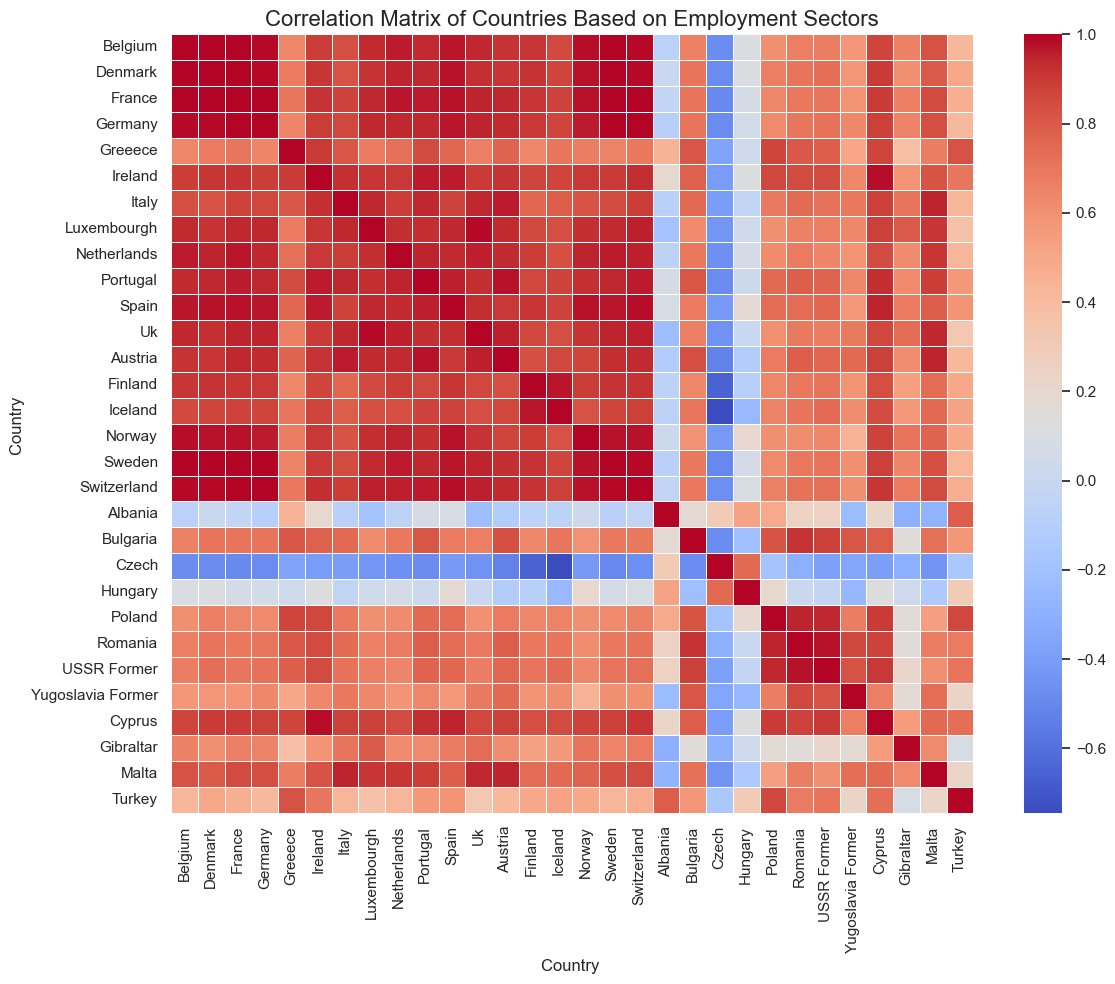

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "Employment DATA With Pivot Table.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Clean column names (correct typos)
df = df.rename(columns={
    'Gorup': 'Group',
    'Manufacting': 'Manufacturing',
    'transport': 'Transport'
})

# Set country as index for further analysis
df.set_index('Country ', inplace=True)

# Select only employment-related columns
employment_columns = ['Agriculture', 'Mining', 'Manufacturing', 'Power', 
                      'Construction', 'Services', 'Social Services', 
                      'Transport', 'Finance']
data = df[employment_columns]

# Correlation matrix
corr_matrix = data.T.corr()

# 1. Remove annotations, increase figure size, and rotate labels for better readability
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=False, 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.index)

# Rotate x and y axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Correlation Matrix of Countries Based on Employment Sectors', fontsize=16)
plt.tight_layout()
plt.show()
